DATE                             object
PPI                             float64
Export_PI                       float64
Import_PI                       float64
Employees                       float64
Export_PI_Nosemi                float64
Weights                         float64
Import_PI_Cap                   float64
Export_PI_Cap                   float64
Industrial_Production           float64
DateTime                 datetime64[ns]
Season                            int64
dtype: object
           DATE   PPI  Export_PI  Import_PI  Employees  Export_PI_Nosemi  \
180  01-01-2000  88.8      102.0      101.0      641.0             102.7   
181  01-02-2000  88.6      101.9      100.7      646.0             100.5   
182  01-03-2000  88.6      101.3      100.3      649.0             100.5   
183  01-04-2000  88.9      101.4      101.2      654.3             100.1   
184  01-05-2000  88.5      101.0      100.6      659.1             100.2   
..          ...   ...        ...        ...       

C:\Users\Christian\AppData\Local\Temp\ipykernel_32\595970855.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semi['DateTime'] = pd.to_datetime(semi['DATE'])
C:\Users\Christian\AppData\Local\Temp\ipykernel_32\595970855.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semi['Season'] = (semi['DateTime'].dt.day + 2)//3


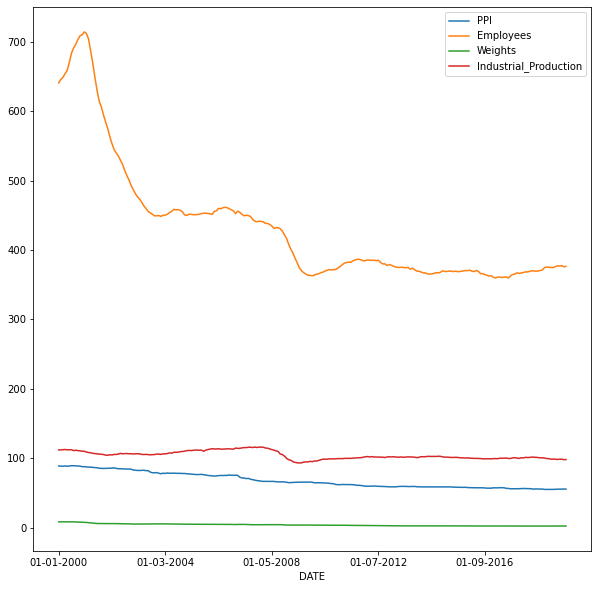

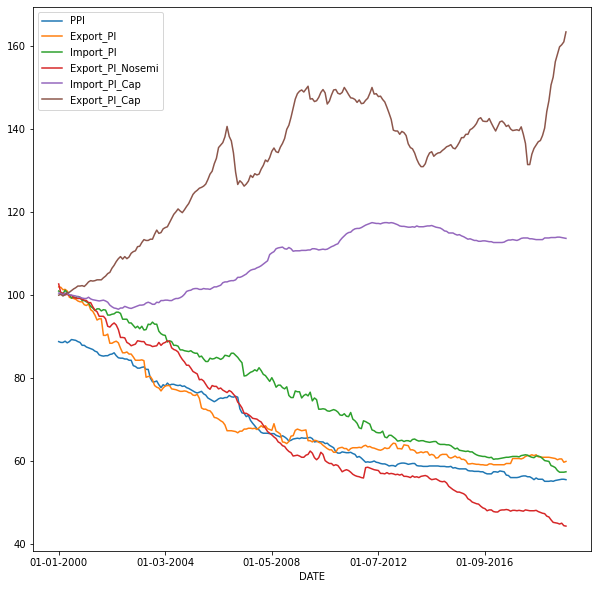

           DATE   PPI  Export_PI  Import_PI  Export_PI_Nosemi  Import_PI_Cap  \
180  01-01-2000  88.8      102.0      101.0             102.7          100.5   
181  01-02-2000  88.6      101.9      100.7             100.5          100.4   
182  01-03-2000  88.6      101.3      100.3             100.5          100.1   
183  01-04-2000  88.9      101.4      101.2             100.1          100.5   
184  01-05-2000  88.5      101.0      100.6             100.2          100.4   
..          ...   ...        ...        ...               ...            ...   
414  01-07-2019  55.4       60.3       57.7              45.0          114.0   
415  01-08-2019  55.5       60.5       57.3              44.8          114.0   
416  01-09-2019  55.6       60.5       57.3              45.0          113.9   
417  01-10-2019  55.6       59.7       57.3              44.4          113.8   
418  01-11-2019  55.5       59.9       57.4              44.3          113.7   

     Export_PI_Cap  
180          100.0

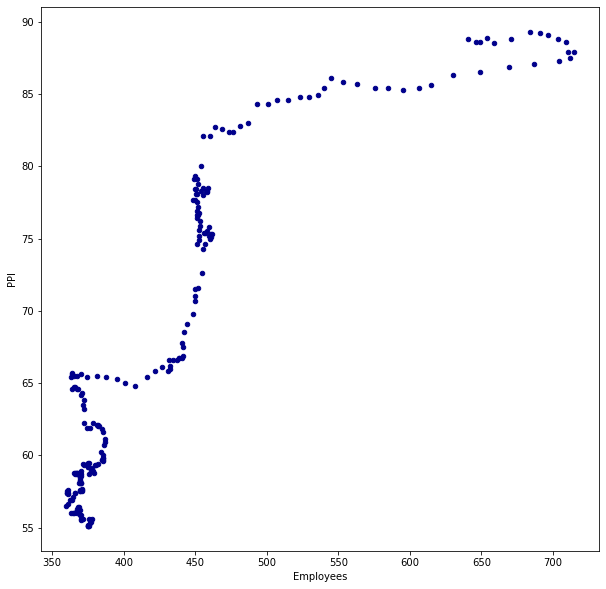

           DATE   PPI  Export_PI  Import_PI  Employees  Export_PI_Nosemi  \
254  01-03-2006  74.6       70.4       85.0      456.7              78.0   
226  01-11-2003  79.3       77.8       93.0      449.5              87.8   
224  01-09-2003  79.1       79.6       93.5      451.4              87.6   
297  01-10-2009  65.6       64.9       75.7      363.6              61.6   
307  01-08-2010  63.8       62.7       72.0      372.0              59.4   
..          ...   ...        ...        ...        ...               ...   
213  01-10-2002  84.3       85.8       93.3      501.0              88.3   
255  01-04-2006  75.0       70.1       84.8      460.1              77.4   
323  01-12-2011  60.2       63.6       69.7      384.4              55.9   
321  01-10-2011  61.1       63.3       68.0      386.7              56.2   
186  01-07-2000  89.3       99.3       99.3      683.8             100.0   

     Weights  Import_PI_Cap  Export_PI_Cap  Industrial_Production   DateTime  \
254   4

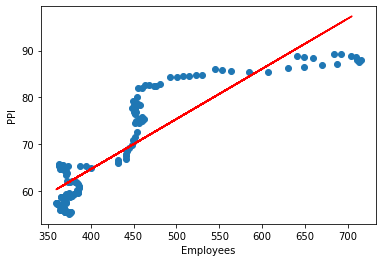

PPI vs Employees Parameters
const        21.667950
Employees     0.107433
dtype: float64

PPI vs Employees
                            OLS Regression Results                            
Dep. Variable:                    PPI   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     574.1
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           1.31e-55
Time:                        13:39:30   Log-Likelihood:                -512.80
No. Observations:                 167   AIC:                             1030.
Df Residuals:                     165   BIC:                             1036.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


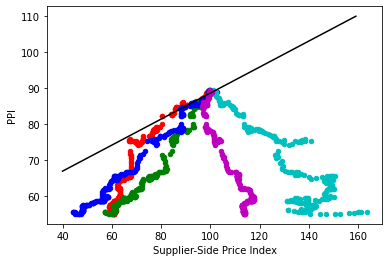

NameError: name 'Y_pi' is not defined

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR

# Read raw data file
# I first tried using the default, long variable (column) names from original data file
# Then tried to "rename" the columns in Python - couldn't get it to work (will need more time)
# So I found it easier to rename the columns in the original *.csv file (new file named "Semi.csv")
semi_raw = pd.read_csv (r'C:\Users\Christian\OneDrive\Graduate School\ANA500\Semi.csv')

# Noticed several missing values; limiting variable (with most missing values) was Export_PI_Cap
# So filtered by recasting table using notnull() Boolean subtable:
semi = semi_raw[semi_raw.Export_PI_Cap.notnull()]

# For seasonality, convert DATE object to DateTime and extract Season as new variable:
semi['DateTime'] = pd.to_datetime(semi['DATE'])
semi['Season'] = (semi['DateTime'].dt.day + 2)//3

# Figured out why I had problems in subsequent code; mixture of data types in the dataframe!
convert_dict = {'Export_PI': float,
                'Import_PI': float,
                'Export_PI_Nosemi': float,
                'Import_PI_Cap': float
                }
semi = semi.astype(convert_dict)
print(semi.dtypes)

# Print the filtered (cleaned) dataframe
print (semi)

# Plot the generalized variables by DATE:
df_gen = pd.DataFrame(semi, columns=["DATE", "PPI", "Employees", "Weights", "Industrial_Production"])
df_gen.plot(x="DATE", y=["PPI", "Employees", "Weights", "Industrial_Production"], kind="line", figsize=(10,10))
plt.show()

# Plot the pricing variables by DATE:
# Note: could not figure out why some of the price index variables were not plotting
#       ^^^ This was because I had a mixture of data types in the dataframe; now all plotting after adding astype conversion
df_ppi = pd.DataFrame(semi, columns=["DATE", "PPI", "Export_PI", "Import_PI", "Export_PI_Nosemi", "Import_PI_Cap", "Export_PI_Cap"])
df_ppi.plot(x="DATE", y=["PPI", "Export_PI", "Import_PI", "Export_PI_Nosemi", "Import_PI_Cap", "Export_PI_Cap"], kind="line", figsize=(10,10))
plt.show()

# Check to see that extracted data frame has all requested columns; still not sure why not plotting
# (Eventually figured out why - it was due to mixed dtypes between each of the variables)
print(df_ppi)

# Scatter plot - hints at the correlation between my two variables in the null hypothesis
df_scatter = pd.DataFrame(semi, columns=["PPI", "Employees"])
ax1 = df_scatter.plot.scatter(x="Employees", y="PPI", c="DarkBlue", figsize=(10,10))
plt.show()

# Split data set into training and test:
train, test = train_test_split(semi, test_size=0.3,random_state=109)
print(train, test)

# Slice the data into test/train x/y:
Y_emp_train = train['PPI']
X_emp_train = train['Employees']
X_emp_train_lr = sm.add_constant(X_emp_train)
Y_emp_test = test['PPI']
X_emp_test = test['Employees']
X_emp_test_lr = sm.add_constant(X_emp_test)

# Start of the linear regression models - first is PPI as a function of Employee [base]
model = LinearRegression(fit_intercept=True).fit(X_emp_train_lr, Y_emp_train)
print()
print('PPI versus Employees in the Industry Linear Regression')
print('------------------------------------------------------')
print('intercept:', model.intercept_)
print('slope:', model.coef_)

Y_emp_pred = model.predict(X_emp_test_lr)
# print('Predicted response:', Y_emp_pred, sep='\n')

plt.scatter(X_emp_train, Y_emp_train)
plt.xlabel("Employees")
plt.ylabel("PPI")
plt.plot(X_emp_test, Y_emp_pred, color = 'r');
plt.show()

model = sm.OLS(Y_emp_train,X_emp_train_lr)
results = model.fit()
print('PPI vs Employees Parameters')
print(results.params)
print()
print('PPI vs Employees')
print(results.summary())

svm_reg = LinearSVR(epsilon=1.5)
lsvr = svm_reg.fit(X_emp_train_lr, Y_emp_train)
print()

score = lsvr.score(X_emp_train_lr, Y_emp_train)
print("PPI vs Employees SVR R-squared:", score)
print("PPI vs Employees SVR Explained Variance Score:", metrics.explained_variance_score(Y_emp_test, Y_emp_pred))

# Second linear regression model is PPI as a function of price indices
Y_pi_train = train['PPI']
X_pi_train = train[['Export_PI', 'Import_PI', 'Export_PI_Nosemi', 'Export_PI_Cap', 'Import_PI_Cap']]
X_pi_train_lr = sm.add_constant(X_pi_train)
Y_pi_test = test['PPI']
X_pi_test = test[['Export_PI', 'Import_PI', 'Export_PI_Nosemi', 'Export_PI_Cap', 'Import_PI_Cap']]
X_pi_test_lr = sm.add_constant(X_pi_test)

# Start of second linear regression, PPI to multiple price indices
model = LinearRegression(fit_intercept=True).fit(X_pi_train_lr, Y_pi_train)
print()
print()
print()
print('PPI versus Price Indices Linear Regression')
print('------------------------------------------')
print('intercept:', model.intercept_)
print('slope:', model.coef_) 

Y_pi_pred = model.predict(X_pi_test_lr)
# print('Predicted response:', Y_pi_pred, sep='\n')

# plt.scatter(X_pi_pre, Y_pi)
# plt.plot(X_pi_pre, y_pi_pred);
# plt.show()

df = pd.DataFrame(semi, columns=['PPI', 'Export_PI', 'Import_PI', 'Export_PI_Nosemi', 'Export_PI_Cap', 'Import_PI_Cap'])

ax1 = df.plot(kind='scatter', x='Export_PI', y='PPI', color='r')    
ax2 = df.plot(kind='scatter', x='Import_PI', y='PPI', color='g', ax=ax1)    
ax3 = df.plot(kind='scatter', x='Export_PI_Nosemi', y='PPI', color='b', ax=ax1)
ax4 = df.plot(kind='scatter', x='Export_PI_Cap', y='PPI', color='c', ax=ax1)
ax5 = df.plot(kind='scatter', x='Import_PI_Cap', y='PPI', color='m', ax=ax1)

piv = np.arange(40, 160, 1, dtype=int)
index = np.array([piv, piv, piv, piv, piv])
df_x_pi_5 = pd.DataFrame({'Export_PI': index[0, :], 'Import_PI': index[1, :], 'Export_PI_Nosemi': index[2, :],
                        'Export_PI_Cap': index[3, :], 'Import_PI_Cap': index[4, :]})
df_x_pi_6 = sm.add_constant(df_x_pi_5)
df_y_pi = model.predict(df_x_pi_6)

print(ax1 == ax2 == ax3 == ax4 == ax5)
plt.xlabel("Supplier-Side Price Index")
plt.ylabel("PPI")
plt.plot(df_x_pi_5['Export_PI'], df_y_pi, color='k');
plt.show()

model = sm.OLS(Y_pi,X_pi)
results = model.fit()
print('PPI vs Price Index Parameters')
print(results.params)
print()
print('PPI vs Price')
print(results.summary())

In [9]:
from sklearn import linear_model

Y_pi = semi['PPI']
X_pi_pre = semi[['Export_PI', 'Import_PI', 'Export_PI_Nosemi', 'Export_PI_Cap', 'Import_PI_Cap']]

regr = linear_model.LinearRegression()
regr.fit(X_pi_pre, Y_pi)

LinearRegression()

In [3]:
df_x_pi = pd.DataFrame(np.arange(40, 160, 1, dtype=int), columns=['Price_Index'])
print(df_x_pi)

     Price_Index
0             40
1             41
2             42
3             43
4             44
..           ...
115          155
116          156
117          157
118          158
119          159

[120 rows x 1 columns]


<AxesSubplot:xlabel='Season', ylabel='PPI'>

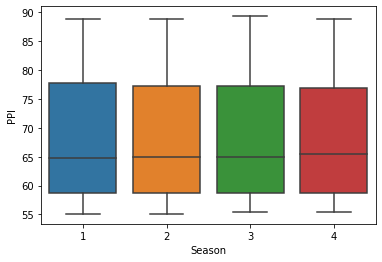

In [30]:
# This cell and the following cells is trying to figure out how to convert the DATE object variable
# in the original data set from DD-MM-YYYY to seasons (either 1,2,3,4 or 1st QTR, 2nd QTR, 3rd, & 4th,
# or Winter, Spring, Summer, Fall)

sns.boxplot(x = semi['Season'],
            y = semi['PPI'])

In [45]:
piv = np.arange(40, 160, 1, dtype=int)
index = np.array([piv, piv, piv, piv, piv])
df_x_pi = pd.DataFrame({'Export_PI': index[0, :], 'Import_PI': index[1, :], 'Export_PI_Nosemi': index[2, :],
                        'Export_PI_Cap': index[3, :], 'Import_PI_Cap': index[4, :]})

In [46]:
df_x_pi

,Export_PI,Import_PI,Export_PI_Nosemi,Export_PI_Cap,Import_PI_Cap
0,40,40,40,40,40
1,41,41,41,41,41
2,42,42,42,42,42
3,43,43,43,43,43
4,44,44,44,44,44
...,...,...,...,...,...
115,155,155,155,155,155
116,156,156,156,156,156
117,157,157,157,157,157
118,158,158,158,158,158
